<a href="https://colab.research.google.com/github/DavideMichelon10/mplsoccer-example/blob/main/mplsoccer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pitch basics

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import pip

def import_or_install(package):
    try:
        print("IMPORTING...")
        __import__(package)
    except ImportError:
        pip.main(['install', package]) 

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [3]:
import_or_install("mplsoccer")

IMPORTING...


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

Collecting mplsoccer

Downloading mplsoccer-1.1.12-py3-none-any.whl (68 kB)

Output()

Requirement already satisfied: matplotlib in /usr/local/lib/python3.10/dist-packages (from mplsoccer) (3.7.1)

Requirement already satisfied: numpy in /usr/local/lib/python3.10/dist-packages (from mplsoccer) (1.22.4)

Requirement already satisfied: pandas in /usr/local/lib/python3.10/dist-packages (from mplsoccer) (1.5.3)

Requirement already satisfied: pillow in /usr/local/lib/python3.10/dist-packages (from mplsoccer) (8.4.0)

Requirement already satisfied: requests in /usr/local/lib/python3.10/dist-packages (from mplsoccer) (2.27.1)

Requirement already satisfied: scipy in /usr/local/lib/python3.10/dist-packages (from mplsoccer) (1.10.1)

Requirement already satisfied: seaborn in /usr/local/lib/python3.10/dist-packages (from mplsoccer) (0.12.2)

Requirement already satisfied: contourpy>=1.0.1 in /usr/local/lib/python3.10/dist-packages (from matplotlib->mplsoccer) (1.0.7)

Requirement already satisfied: cycler>=0.10 in /usr/local/lib/python3.10/dist-packages (from matplotlib->mplsoccer) (0.11.0)

Requirement already satisfied: fonttools>=4.22.0 in /usr/local/lib/python3.10/dist-packages (from matplotlib->mplsoccer) (4.39.3)

Requirement already satisfied: kiwisolver>=1.0.1 in /usr/local/lib/python3.10/dist-packages (from matplotlib->mplsoccer) (1.4.4)

Requirement already satisfied: packaging>=20.0 in /usr/local/lib/python3.10/dist-packages (from matplotlib->mplsoccer) (23.1)

Requirement already satisfied: pyparsing>=2.3.1 in /usr/local/lib/python3.10/dist-packages (from matplotlib->mplsoccer) (3.0.9)

Requirement already satisfied: python-dateutil>=2.7 in /usr/local/lib/python3.10/dist-packages (from matplotlib->mplsoccer) (2.8.2)

Requirement already satisfied: pytz>=2020.1 in /usr/local/lib/python3.10/dist-packages (from pandas->mplsoccer) (2022.7.1)

Requirement already satisfied: urllib3<1.27,>=1.21.1 in /usr/local/lib/python3.10/dist-packages (from requests->mplsoccer) (1.26.15)

Requirement already satisfied: certifi>=2017.4.17 in /usr/local/lib/python3.10/dist-packages (from requests->mplsoccer) (2022.12.7)

Requirement already satisfied: charset-normalizer~=2.0.0 in /usr/local/lib/python3.10/dist-packages (from requests->mplsoccer) (2.0.12)

Requirement already satisfied: idna<4,>=2.5 in /usr/local/lib/python3.10/dist-packages (from requests->mplsoccer) (3.4)

Requirement already satisfied: six>=1.5 in /usr/local/lib/python3.10/dist-packages (from python-dateutil>=2.7->matplotlib->mplsoccer) (1.16.0)

Installing collected packages: mplsoccer

Successfully installed mplsoccer-1.1.12

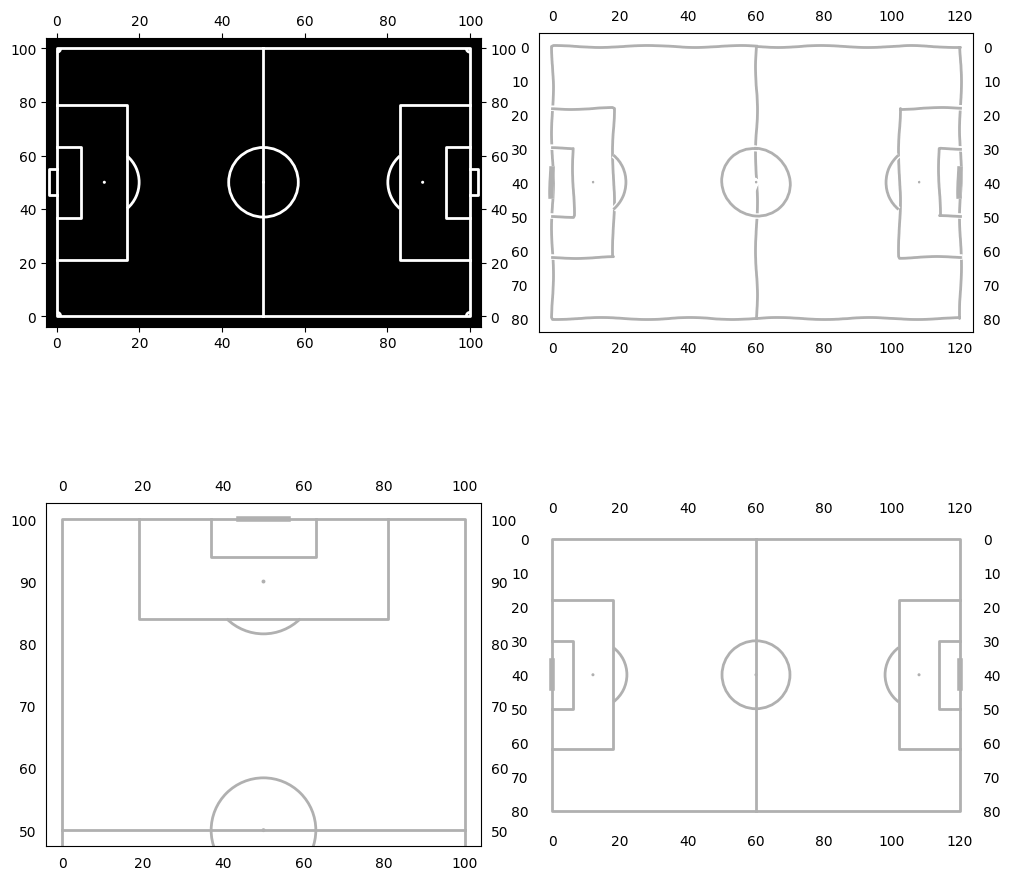

In [4]:
from mplsoccer import Pitch, VerticalPitch

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10),  constrained_layout=True)
plt.tight_layout()

#pitch = Pitch(pitch_color='grass', pitch_type="opta", line_color='white', stripe=True)
pitch = Pitch(pitch_type="opta", axis = True, label=True, pitch_color='black', corner_arcs=True, line_color='white', goal_type='box', tick=True)
pitch1 = Pitch(pitch_type="statsbomb", axis = True, label=True)
pitch2= VerticalPitch(pitch_type="wyscout", axis = True, label=True, half=True)
pitch3 = Pitch(axis = False,label=True)

pitch.draw(ax=axs[0,0])
with plt.xkcd():
  pitch1.draw(ax=axs[0,1])

pitch2.draw(ax=axs[1,0])
pitch3.draw(ax=axs[1,1])


plt.show()

# Radar Charts

In [5]:
from mplsoccer import Radar, FontManager, grid
# Radar better than charts because people prefer and also better in data comparison

In [6]:
# parameter names of the statistics we want to show
params = ["npxG", "Non-Penalty Goals", "xA", "Key Passes", "Through Balls",
          "Progressive Passes", "Shot-Creating Actions", "Goal-Creating Actions",
          "Dribbles Completed", "Pressure Regains", "Touches In Box", "Miscontrol"]

# The lower and upper boundaries for the statistics
low =  [0.08, 0.0, 0.1, 1, 0.6,  4, 3, 0.3, 0.3, 2.0, 2, 0]
high = [0.37, 0.6, 0.6, 4, 1.2, 10, 8, 1.3, 1.5, 5.5, 5, 5]

# Add anything to this list where having a lower number is better
# this flips the statistic
lower_is_better = ['Miscontrol']

In [7]:
radar = Radar(
  params,
  low,
  high,
  lower_is_better=lower_is_better,
  # whether to round any of the labels to integers instead of decimal places
  round_int=[False]*len(params),
  num_rings=6,  # the number of concentric circles (excluding center circle)
  # if the ring_width is more than the center_circle_radius then
  # the center circle radius will be wider than the width of the concentric circles
  ring_width=1, center_circle_radius=1)

In [8]:
URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

In [9]:
# get player data from: https://fbref.com/en/
bruno_values =   [0.22, 0.25, 0.30, 2.54, 0.43, 5.60, 4.34, 0.29, 0.69, 5.14, 4.97, 1.10]
bruyne_values =  [0.25, 0.52, 0.37, 3.59, 0.41, 6.36, 5.68, 0.57, 1.23, 4.00, 4.54, 1.39]
erikson_values = [0.13, 0.10, 0.35, 3.08, 0.29, 6.23, 5.08, 0.43, 0.67, 3.07, 1.34, 1.06]

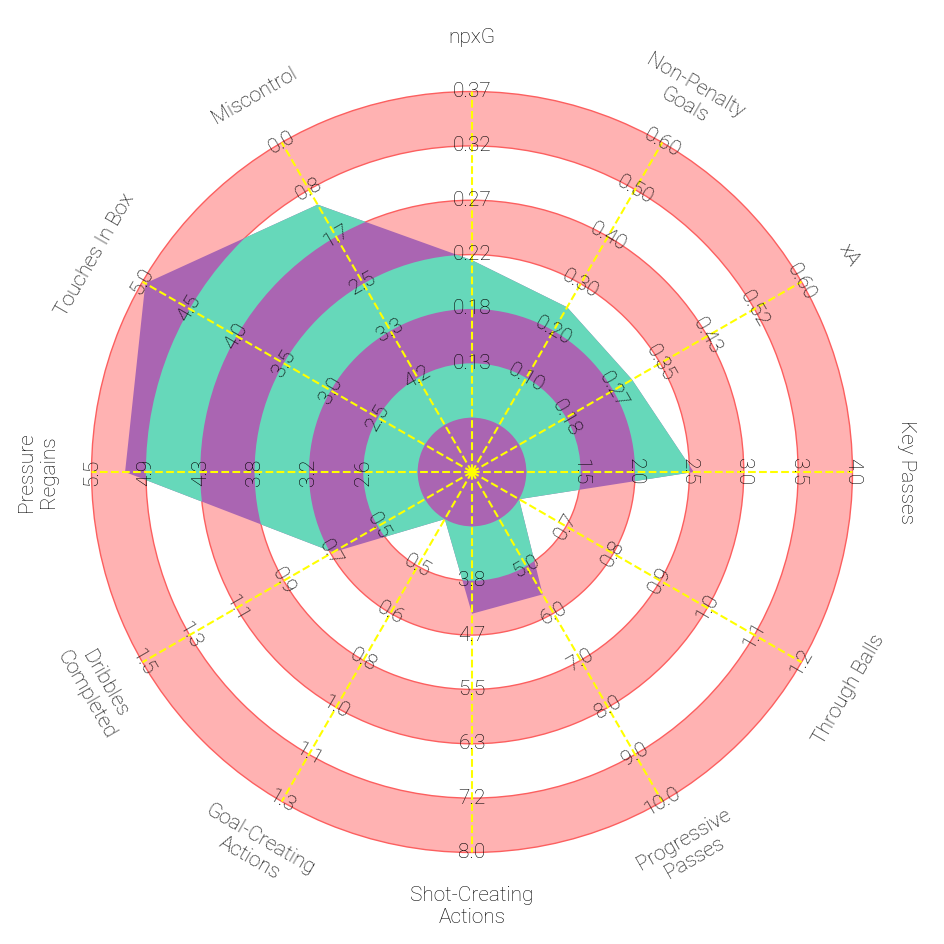

In [10]:
fig, ax = radar.setup_axis()  # format axis as a radar
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')  # draw circles
radar_output = radar.draw_radar(bruno_values, ax=ax,
                                kwargs_radar={'facecolor': '#aa65b2'},
                                kwargs_rings={'facecolor': '#66d8ba'})  # draw the radar
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)  # draw the range labels
param_labels = radar.draw_param_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)  # draw the param labels
spokes = radar.spoke(ax=ax, linestyle="--", color="yellow")

## Making comparison

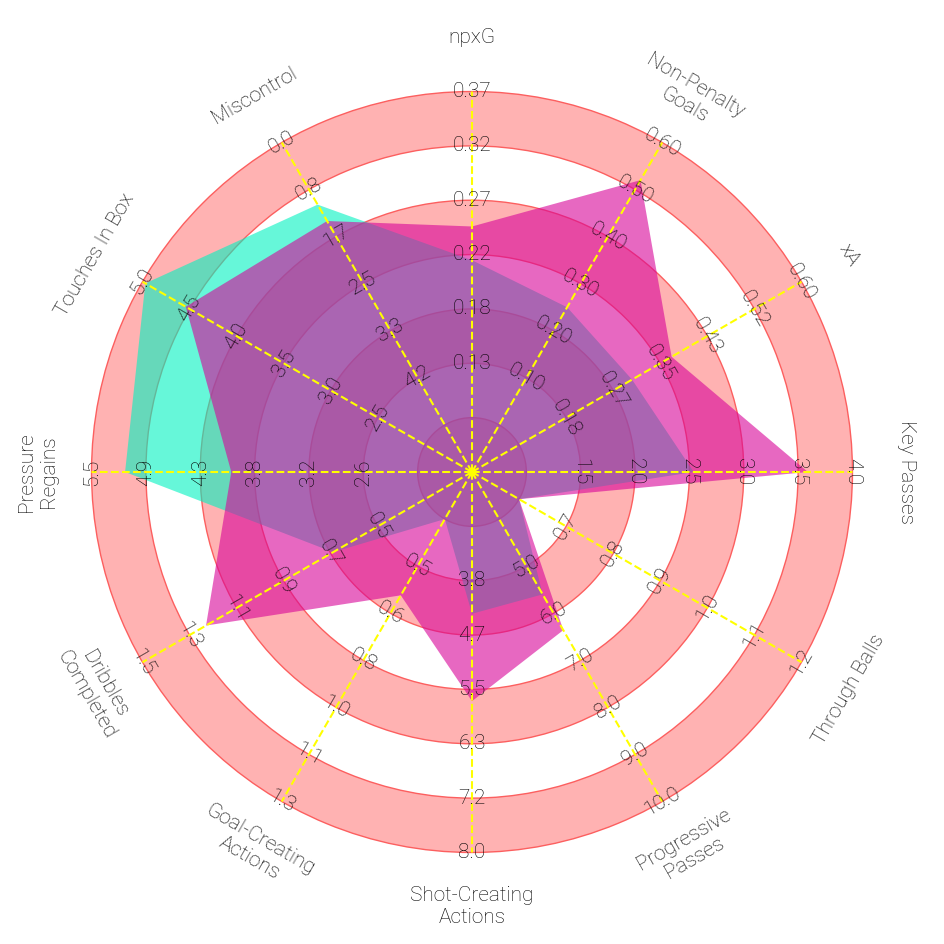

In [11]:
fig, ax = radar.setup_axis()  # format axis as a radar
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')  # draw circles
radar_output = radar.draw_radar_compare(bruno_values, bruyne_values, ax=ax,
                                        kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#d80499', 'alpha': 0.6})
radar_poly, rader_poly2, vertices, vertices2 = radar_output

range_labels = radar.draw_range_labels(ax=ax, fontsize=15,fontproperties=robotto_thin.prop)  # draw the range labels
param_labels = radar.draw_param_labels(ax=ax, fontsize=15,fontproperties=robotto_thin.prop)  # draw the param labels
spokes = radar.spoke(ax=ax, linestyle="--", color="yellow")

## Compare more than two players

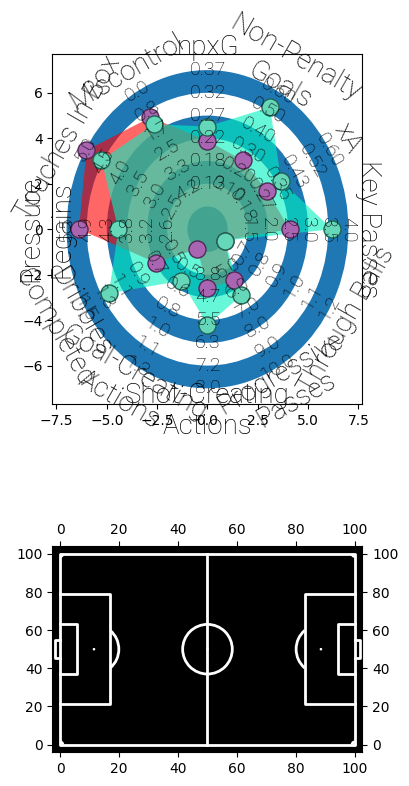

In [12]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(4,10),  constrained_layout=False)

pitch = Pitch(pitch_type="opta", axis = True, label=True, pitch_color='black', corner_arcs=True, line_color='white', goal_type='box', tick=True)

pitch.draw(ax=axs[1])

rings_inner = radar.draw_circles(ax=axs[0])
poly1, vert1 = radar.draw_radar_solid(bruno_values, ax=axs[0], kwargs={'facecolor': 'red', 'alpha': 0.6})
poly2, vert2 = radar.draw_radar_solid(bruyne_values, ax=axs[0], kwargs={'facecolor': '#00f2c1', 'alpha': 0.6})

axs[0].scatter(vert1[:, 0], vert1[:, 1],
           c='#aa65b2', edgecolors='#502a54', marker='o', s=150, zorder=2)
axs[0].scatter(vert2[:, 0], vert2[:, 1],
           c='#66d8ba', edgecolors='#216352', marker='o', s=150, zorder=2)

range_labels = radar.draw_range_labels(ax=axs[0], fontsize=14, fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs[0], fontsize=20, fontproperties=robotto_thin.prop)

plt.show()

## Add title and note

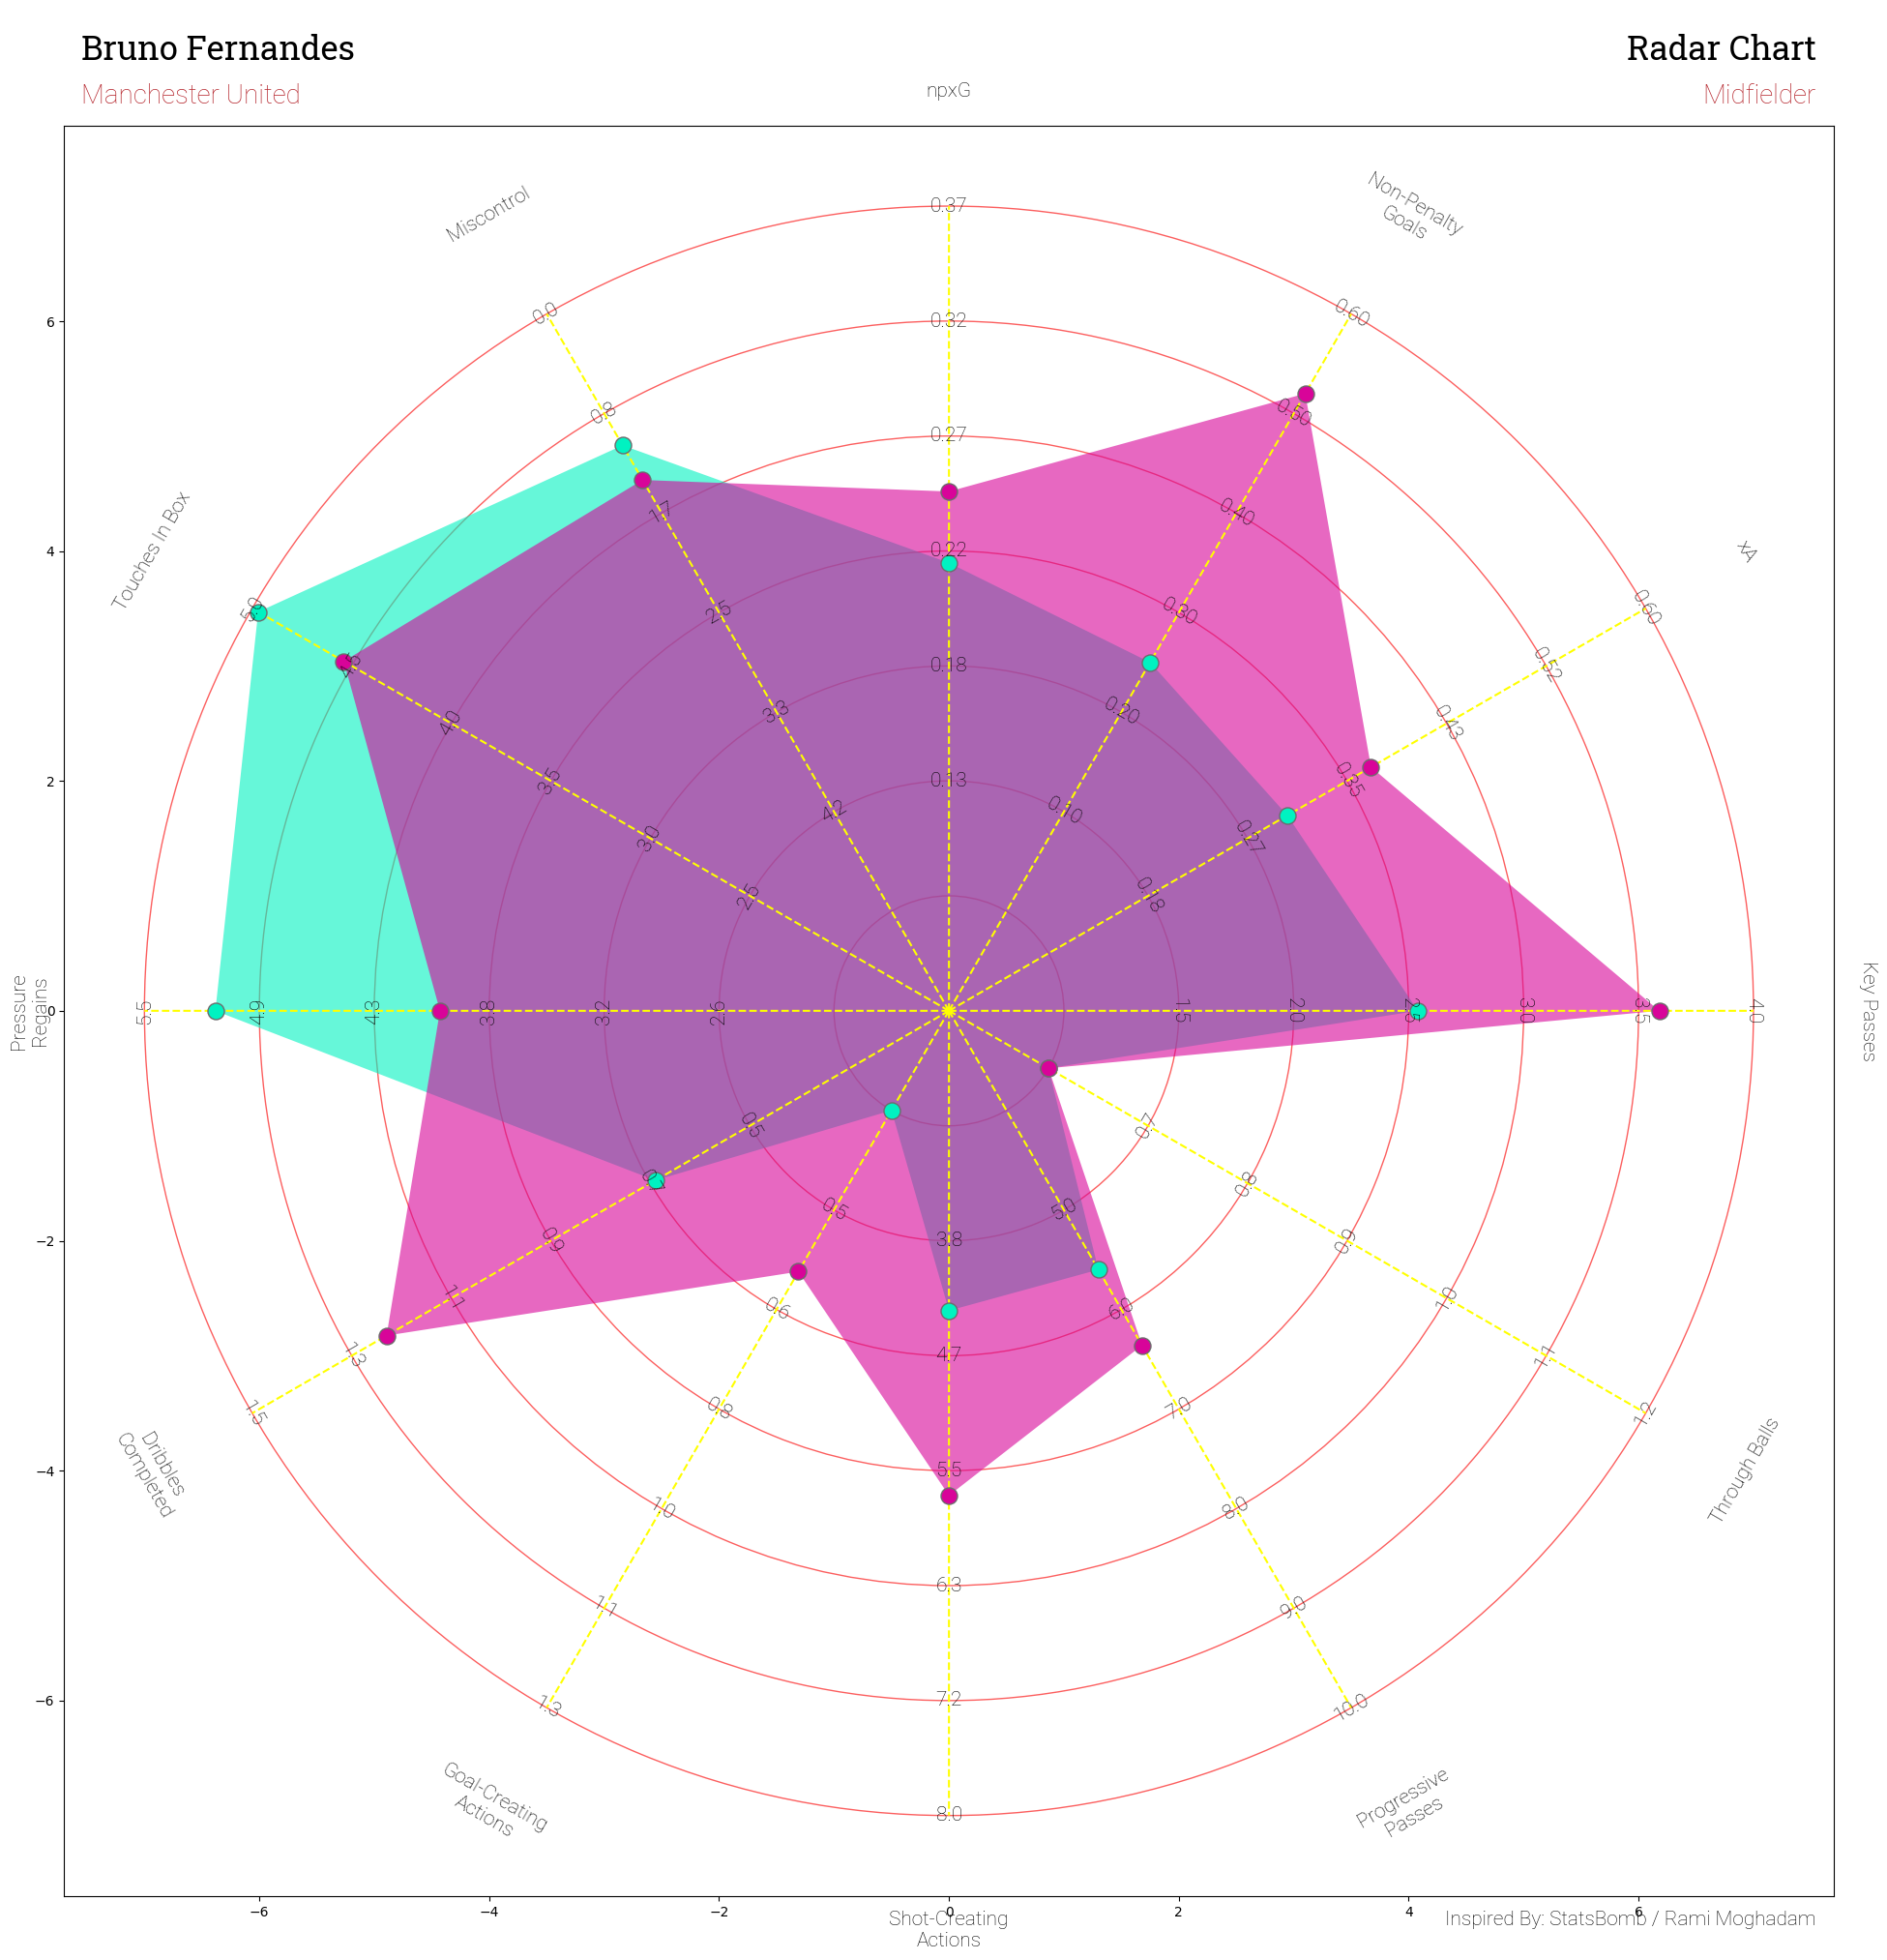

In [13]:
fig, axs = grid(figheight=20, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='None', edgecolor='#fc5f5f')  # draw circles
radar_output = radar.draw_radar_compare(bruno_values, bruyne_values, ax=axs['radar'],
                                        kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#d80499', 'alpha': 0.6})

radar_poly, rader_poly2, vertices1, vertices2 = radar_output

range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=15,fontproperties=robotto_thin.prop)  # draw the range labels
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=15,fontproperties=robotto_thin.prop)  # draw the param labels
spokes = radar.spoke(ax=axs['radar'], linestyle="--", color="yellow")

axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c='#00f2c1', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c='#d80499', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)

endnote_text = axs['endnote'].text(0.99, 0.5, 'Inspired By: StatsBomb / Rami Moghadam', fontsize=15,
                                   fontproperties=robotto_thin.prop, ha='right', va='center')

title1_text = axs['title'].text(0.01, 0.65, 'Bruno Fernandes', fontsize=25,
                                fontproperties=robotto_bold.prop, ha='left', va='center')

title2_text = axs['title'].text(0.01, 0.25, 'Manchester United', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#B6282F')

title3_text = axs['title'].text(0.99, 0.65, 'Radar Chart', fontsize=25,
                                fontproperties=robotto_bold.prop, ha='right', va='center')

title4_text = axs['title'].text(0.99, 0.25, 'Midfielder', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#B6282F')

# Work with JSON

In [14]:
import requests
import json

url = 'https://raw.githubusercontent.com/statsbomb/open-data/master/data/competitions.json'
resp = requests.get(url)

# It applies conversion to Python (i.e. true -> True)
json_competitions = json.loads(resp.text)

In [15]:
competitions = pd.DataFrame.from_records(json_competitions)
competitions.head(5)

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00


In [16]:
competitions.iloc[[competitions.tail(1).index.item()]]["season_id"]

42    30
Name: season_id, dtype: int64

# Example of computing most likely receiver

### Data creation

In [179]:
import random
from mplsoccer import Pitch
from matplotlib import animation
from IPython.display import HTML

NUM_FRAMES = 20
# The diagonal of a 100x100 square is 141.4213562373095
DIAGONAL = 142
MAX_SHIFT = 30
method = 2

In [180]:
home = {
    'Frame': 0,
    '1_x': np.random.uniform(low=1, high=100, size=(1,)),
    '1_y': np.random.uniform(low=1, high=100, size=(1,)),
    '2_x': np.random.uniform(low=1, high=100, size=(1,)),
    '2_y': np.random.uniform(low=1, high=100, size=(1,)),
    '3_x': np.random.uniform(low=1, high=100, size=(1,)),
    '3_y': np.random.uniform(low=1, high=100, size=(1,)),
    '4_x': np.random.uniform(low=1, high=100, size=(1,)),
    '4_y': np.random.uniform(low=1, high=100, size=(1,)),
    '5_x': np.random.uniform(low=1, high=100, size=(1,)),
    '5_y': np.random.uniform(low=1, high=100, size=(1,))
}


away = {
    'Frame': 0,
    '1_x': np.random.uniform(low=1, high=100, size=(1,)),
    '1_y': np.random.uniform(low=1, high=100, size=(1,)),
    '2_x': np.random.uniform(low=1, high=100, size=(1,)),
    '2_y': np.random.uniform(low=1, high=100, size=(1,)),
    '3_x': np.random.uniform(low=1, high=100, size=(1,)),
    '3_y': np.random.uniform(low=1, high=100, size=(1,)),
    '4_x': np.random.uniform(low=1, high=100, size=(1,)),
    '4_y': np.random.uniform(low=1, high=100, size=(1,)),
    '5_x': np.random.uniform(low=1, high=100, size=(1,)),
    '5_y': np.random.uniform(low=1, high=100, size=(1,))
}

ball = {
    'Frame': 0,
    'ball_x': np.random.uniform(low=1, high=100, size=(1,)),
    'ball_y': np.random.uniform(low=1, high=100, size=(1,))
}

passages = {
    'Frame' : [0],
    'sender_x': None,
    'sender_y': None,
    'receiver_x' : None,
    'receiver_y': None
}

# Create DataFrame
df_home = pd.DataFrame(home)
df_away = pd.DataFrame(away)
df_ball = pd.DataFrame(ball)
df_passages = pd.DataFrame(passages)

In [181]:
def update_position(coordinate):
  coordinate = coordinate.values
  new_coordinate = coordinate + random.uniform(0, MAX_SHIFT)

  if new_coordinate > 101:
      new_coordinate = np.random.uniform(low=1, high=100, size=(1,))

  return new_coordinate
      
def get_new_position(i, last_frame, ball=True):
  new_row = {}
  if ball:
    new_row = {
        'Frame': i, 
        'ball_x' : update_position(last_frame['ball_x']),
        'ball_y' : update_position(last_frame['ball_y']),
        'home_possess_ball' : None,
        'player_possess': None 
    }

  else:
    new_row = {
              'Frame': i, 
              '1_x': update_position(last_frame['1_x']),
              '1_y': update_position(last_frame['1_y']),
              '2_x': update_position(last_frame['2_x']),
              '2_y': update_position(last_frame['2_y']),
              '3_x': update_position(last_frame['3_x']),
              '3_y': update_position(last_frame['3_y']),
              '4_x': update_position(last_frame['4_x']),
              '4_y': update_position(last_frame['4_y']),
              '5_x': update_position(last_frame['5_x']),
              '5_y': update_position(last_frame['5_y'])
             }        

  return pd.DataFrame(new_row)

In [182]:
for i in range(1, NUM_FRAMES):
  last_frame_home = df_home.iloc[-1:]
  last_frame_away = df_away.iloc[-1:]
  last_frame_ball = df_ball.iloc[-1:]

  new_home = get_new_position(i,last_frame_home, ball=False)
  df_home = pd.concat([df_home, new_home])

  new_away = get_new_position(i, last_frame_away, ball=False)
  df_away = pd.concat([df_away, new_away])

  new_ball = get_new_position(i, last_frame_ball, ball=True)
  df_ball = pd.concat([df_ball, new_ball])

df_home=df_home.set_index('Frame')
df_away=df_away.set_index('Frame')
df_ball=df_ball.set_index('Frame')
df_passages=df_passages.set_index('Frame')

### Methodology

In [192]:
THRESHOLD = 10
PENALITY_C = 80000

In [193]:
def euclidean_distances(i, df, x, y):
  distances = np.sqrt((df.loc[i, ['1_x', '2_x', '3_x', '4_x', '5_x']].values - x)**2 +
                             (df.loc[i, ['1_y', '2_y', '3_y', '4_y', '5_y']].values - y)**2)
  return distances

In [194]:
def method_1(i, df, x, y):
  """
  x,y: position of the possessor of the ball
  df_ df_home is the possessor is from home, df_away otherwise
  """
  distances = euclidean_distances(i, df, x, y)

  distances[distances == 0] = DIAGONAL + 1

  closest_teammate_idx = np.argmin(distances)

  closest_teammate = df.loc[i, ['1_x', '1_y', '2_x', '2_y', '3_x', '3_y', '4_x', '4_y', '5_x', '5_y']].values.reshape(-1, 2)[closest_teammate_idx] 
  return closest_teammate

In [195]:
def penalityC(i, df_opp, team_sender_x, team_sender_y):

  minimum_distance_opposing_player = []

  for j in range(len(team_sender_x)):

    # distance of each teammates with the closest opposing player
    minimum_distance_opposing_player.append(euclidean_distances(i, df_opp, team_sender_x[j], team_sender_y[j]).min())

  return minimum_distance_opposing_player

In [196]:
def method_2(i, df_sender, df_opp, team_sender_x, team_sender_y, sender_x, sender_y):

  distance_teammates = euclidean_distances(i, df_sender, sender_x, sender_y)

  minimum_distance_opposing_player = penalityC(i, df_opp, team_sender_x, team_sender_y)

  sender_index = np.where((team_sender_x == sender_x) & (team_sender_y == sender_y))[0][0]

  score = []

  for j in range(len(team_sender_x)):
    penality = 0
    if j == sender_index: 
      score.append(10000000)
    else:
      if minimum_distance_opposing_player[j] < THRESHOLD: 
        penality = PENALITY_C
      score.append(distance_teammates[j] + penality)

  return score

In [197]:
def penalityD(i, df_sender, df_opp, team_sender_x, team_sender_y, sender_x, sender_y):

  distance_teammates = euclidean_distances(i, df_sender, sender_x, sender_y)
  minimum_distances_opposing_player = np.zeros((len(team_sender_x), 2))

  for j in range(len(team_sender_x)):
    distances = euclidean_distances(i, df_opp, team_sender_x[j], team_sender_y[j])
    sorted_distances = np.sort(distances)
    minimum_distances_opposing_player[j] = sorted_distances[:2]  # Save the two minimum distances in the matrix

  print(minimum_distances_opposing_player)

In [198]:
def most_likely_receiver(i, is_home, method):
  """
  Determine the most likely receiver based on the given parameters.
  method = 1: the closest teammate
  method = 2: score(y) = d(x,y) + penalityC(y, o)
    penalityC(y,O) if exist a player with d(y,O) < threshold
    penalityC(y,O)=0 otherwise
  method = 3: distance + penalityC + penalityD
    penalityD = K, if two players in the radius
  """

  sender_x = df_passages.at[i, 'sender_x']
  sender_y = df_passages.at[i, 'sender_y']

  if is_home:
    team_sender_x = df_home.iloc[i, [0, 2, 4, 6, 8]].values
    team_sender_y = df_home.iloc[i, [1, 3, 5, 7, 9]].values
  else:
    team_sender_x = df_away.iloc[i, [0, 2, 4, 6, 8]].values
    team_sender_y = df_away.iloc[i, [1, 3, 5, 7, 9]].values

  if method == 1:
    if is_home:
      closest_teammate = method_1(i, df_home, sender_x, sender_y)
    else:

      closest_teammate = method_1(i, df_away, sender_x, sender_y)

  elif method == 2:
    if is_home:
      score = method_2(i, df_home, df_away, team_sender_x, team_sender_y, sender_x, sender_y)
    else:
      score = method_2(i, df_away, df_home, team_sender_x, team_sender_y, sender_x, sender_y)

    # do not consider the sender himself
    lowest_score_index = np.argmin(score)
    closest_teammate = team_sender_x[lowest_score_index], team_sender_y[lowest_score_index]

  elif method == 3:
    if is_home:
      score = penalityD(i, df_home, df_away,  team_sender_x, team_sender_y, sender_x, sender_y)
    else:
      score = penalityD(i, df_away, df_home,  team_sender_x, team_sender_y, sender_x, sender_y)
    
    
  elif method == 4:

    pass
  else:
        # Handle invalid method value
        raise ValueError("Invalid method value. Expected values: 1, 2, 3, 4")
  return closest_teammate

In [199]:
def compute_closest_player_to_ball(i, df_home, df_ball, df_away):
    """
    Compute closed player to ball and update df_ball 
    """
    # Calculate the Euclidean distance between each player's coordinates and the ball's coordinates
    home_distances = euclidean_distances(i, df_home, df_ball.loc[i, 'ball_x'], df_ball.loc[i, 'ball_y'])
    away_distances = euclidean_distances(i, df_away, df_ball.loc[i, 'ball_x'], df_ball.loc[i, 'ball_y'])
    
    # Find the index of the player with the minimum distance
    home_closest_idx = np.argmin(home_distances)
    away_closest_idx = np.argmin(away_distances)
    
    if home_distances[home_closest_idx] < away_distances[away_closest_idx]:
        # home
        df_ball.at[i, 'home_possess_ball'] = True
        df_ball.at[i, 'player_possess'] = home_closest_idx
        player_possess = int(df_ball.at[i, 'player_possess'])
        closest_player = df_home.loc[i, ['1_x', '1_y', '2_x', '2_y', '3_x', '3_y', '4_x', '4_y', '5_x', '5_y']].values.reshape(-1, 2)[player_possess]
        df_passages.at[i, 'sender_x'], df_passages.at[i, 'sender_y'] = closest_player

    else:
        # away
        df_ball.at[i, 'home_possess_ball'] = False
        df_ball.at[i, 'player_possess'] = away_closest_idx
        player_possess = int(df_ball.at[i, 'player_possess'])
        closest_player = df_away.loc[i,  ['1_x', '1_y', '2_x', '2_y', '3_x', '3_y', '4_x', '4_y', '5_x', '5_y']].values.reshape(-1, 2)[player_possess]
        df_passages.at[i, 'sender_x'], df_passages.at[i, 'sender_y'] = closest_player

    receiver = most_likely_receiver(i, df_ball.at[i, 'home_possess_ball'], method)
    df_passages.at[i, 'receiver_x'], df_passages.at[i, 'receiver_y'] = receiver[0], receiver[1]

for i in range(len(df_ball.index)):
  compute_closest_player_to_ball(i, df_home, df_ball, df_away)

### Visualization

Animation.save using <class 'matplotlib.animation.FFMpegWriter'>

MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 900x400 -pix_fmt rgba -r 1.0 -i pipe: -vcodec h264 -pix_fmt yuv420p -y /tmp/tmpf90rijn4/temp.m4v

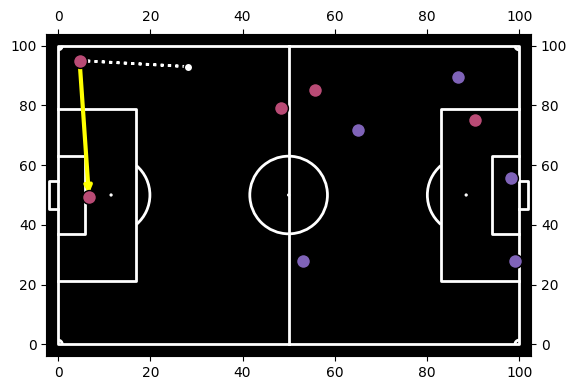

In [200]:
import matplotlib.patches as patches


pitch = Pitch(pitch_type="opta", axis=True, label=True, pitch_color='black', corner_arcs=True,
              line_color='white', goal_type='box', tick=True)
fig, ax = pitch.draw(figsize=(9, 4 ))

# Set up the pitch plot markers we want to animate

marker_kwargs = {'marker': 'o', 'markeredgecolor': 'black', 'linestyle': 'None'}
ball, = ax.plot([], [], ms=6, markerfacecolor='w', zorder=3, **marker_kwargs)
home, = ax.plot([], [], ms=10, markerfacecolor='#7f63b8', **marker_kwargs)  # purple
away, = ax.plot([], [], ms=10, markerfacecolor='#b94b75', **marker_kwargs)  # red/maroon

arrow_possessor = None
arrow_pass = None

def animate(i):
    global arrow_possessor
    global arrow_pass
    """Function to animate the data. Each frame it sets the data for the players and the ball."""
    ball.set_data([df_ball.iloc[i, 0]], [df_ball.iloc[i, 1]])

    # Set the player data using the frame id
    home.set_data(df_home.loc[i, ['1_x', '2_x', '3_x', '4_x', '5_x']].values,
                  df_home.loc[i, ['1_y', '2_y', '3_y', '4_y', '5_y']].values)

    away.set_data(df_away.loc[i, ['1_x', '2_x', '3_x', '4_x', '5_x']].values,
                  df_away.loc[i, ['1_y', '2_y', '3_y', '4_y', '5_y']].values)

    home_possess_ball = df_ball.at[i, 'home_possess_ball']
    player_possess = int(df_ball.at[i, 'player_possess'])

    if home_possess_ball:
        closest_player = df_home.loc[i, ['1_x', '1_y', '2_x', '2_y', '3_x', '3_y', '4_x', '4_y', '5_x', '5_y']].values.reshape(-1, 2)[player_possess]
        color = '#7f63b8'  # purple
    else:
        closest_player = df_away.loc[i, ['1_x', '1_y', '2_x', '2_y', '3_x', '3_y', '4_x', '4_y', '5_x', '5_y']].values.reshape(-1, 2)[player_possess]
        color = '#b94b75'  # red/maroon

    if arrow_possessor is not None:
        arrow_possessor.remove()  # Remove the previous arrow if it exists

    arrow_possessor = patches.FancyArrow(df_ball.iloc[i, 0], df_ball.iloc[i, 1], closest_player[0] - df_ball.iloc[i, 0],
                               closest_player[1] - df_ball.iloc[i, 1], color='white', linestyle='dotted',
                               linewidth=2, head_length=0, head_width=0)
     
    ax.add_patch(arrow_possessor)

    if arrow_pass is not None:
        arrow_pass.remove()  # Remove the previous arrow if it exists
    sender_x, sender_y = df_passages.iloc[i, 0], df_passages.iloc[i, 1]
    receiver_x, receiver_y =  df_passages.iloc[i, 2], df_passages.iloc[i, 3]
    arrow_pass = patches.FancyArrowPatch((sender_x, sender_y), (receiver_x, receiver_y),
                                    color='yellow', linewidth=3, arrowstyle='->', mutation_scale=10)

    ax.add_patch(arrow_pass)

    return ball, home

# Call the animator with 25 frames per second
anim = animation.FuncAnimation(fig, animate, frames=len(df_ball), interval=1000, blit=True)

# Display the animation
HTML(anim.to_html5_video())